In [20]:
# Python imports 
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from spectral.io import envi
from pyproj import Proj
import os
from glob import glob

In [22]:
# Examine Adjacent Quick Look geoTIFF Scenes using GDAL
for geotiff in glob("AVIRIS-NG/*.tif"):
    print(f"{os.path.basename(geotiff)}")

ang20231109t133124_005_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231113t104533_004_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231113t131251_003_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t101852_017_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT_QL.tif
ang20231126t103917_017_L2A_OE_main_27577724_RFL_ORT_QL.tif


In [24]:
# open and read tif files for comparison
ql_018 = gdal.Open('AVIRIS-NG/ang20231126t101852_018_L2A_OE_main_27577724_RFL_ORT_QL.tif')
ql_005 = gdal.Open('AVIRIS-NG/ang20231109t133124_005_L2A_OE_main_27577724_RFL_ORT_QL.tif')
ql_004 = gdal.Open('AVIRIS-NG/ang20231113t104533_004_L2A_OE_main_27577724_RFL_ORT_QL.tif')

nbands_018 = ql_018.RasterCount
ncols_018 = ql_018.RasterXSize
nrows_018 = ql_018.RasterYSize

nbands_005 = ql_005.RasterCount
ncols_005 = ql_005.RasterXSize
nrows_005 = ql_005.RasterYSize

nbands_004 = ql_004.RasterCount
ncols_004 = ql_004.RasterXSize
nrows_004 = ql_004.RasterYSize

print(f"Bands_018:\t{nbands_018}")
print(f"Rows_018:\t{nrows_018}")
print(f"Cols_018:\t{ncols_018}")
print("\n")
print(f"Bands_005:\t{nbands_005}")
print(f"Rows_005:\t{nrows_005}")
print(f"Cols_005:\t{ncols_005}")
print("\n")
print(f"Bands_003:\t{nbands_004}")
print(f"Rows_003:\t{nrows_004}")
print(f"Cols_003:\t{ncols_004}")

Bands_018:	3
Rows_018:	560
Cols_018:	676


Bands_005:	3
Rows_005:	791
Cols_005:	654


Bands_003:	3
Rows_003:	748
Cols_003:	666


In [26]:
ql_018.GetProjection()

'PROJCS["WGS 84 / UTM zone 34S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32734"]]'

In [28]:
# Create a Virtual Raster of the 2 Adjacent AVIRIS-NG Scenes
# build vrt - using AVIRIS-NG quicklook images 

# running gdalbuilvrt as a gdal command line using the '!' in front says do this as a command, not as python
# using scences from the Table Mountain West side

!gdalbuildvrt tm_mosaic.vrt AVIRIS-NG/*.tif

# read in vrt, ql ~ quicklook
tm_vrt = gdal.Open('tm_mosaic.vrt')

nbands_vrt = tm_vrt.RasterCount
ncols_vrt = tm_vrt.RasterXSize
nrows_vrt = tm_vrt.RasterYSize

print(f"Bands_vrt:\t{nbands_vrt}")
print(f"Rows_vrt:\t{nrows_vrt}")
print(f"Cols_vrt:\t{ncols_vrt}")

0...10...20...30...40...50...60...70...80...90...100 - done.
Bands_vrt:	3
Rows_vrt:	13151
Cols_vrt:	1590


In [30]:
# Examine AVIRIS-NG Quiklook Reflectance Data as a Numerical Array

# Recall that we created the quicklook virtual raster (ql_vrt) from two adjacent scenes
tm_array = tm_vrt.ReadAsArray()

# look at the shape. GDAL reads the array as band,x,y.  
print(tm_array.shape)     

(3, 13151, 1590)


In [32]:
# To plot the array with matplotlib, the data need to be arranged as y, x, band.
# We'll transpose the data
trans_array = tm_array.transpose((1,2,0))
print(trans_array.shape)

(13151, 1590, 3)


In [8]:
# To demonstrate that data needs transposed, this will give an error because the data needs to be transposed
# This is the error:  TypeError: Invalid shape (3, 1268, 1216) for image data
# plt.imshow(tm_array)

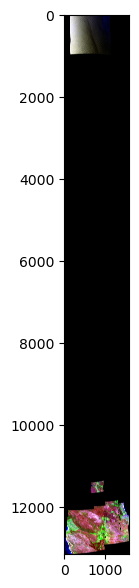

In [34]:
# The imshow() function in the pyplot module of matplotlib library is used to display data as an image.
plt.rcParams['figure.figsize'] = [10,7]
plt.imshow(trans_array)